### 데이터 판다스로 입력, 컬럼 정리

In [1]:
import pandas as pd
ch1 = pd.read_csv('./channel_1.dat', names=['Unix', 'Watt'],header=None, delimiter=" ")
print('Module Import Done.')

Module Import Done.


In [2]:
ch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   Unix    int64
 1   Watt    int64
dtypes: int64(2)
memory usage: 333.2 MB


In [3]:
from datetime import datetime
ch1_date = pd.DataFrame(ch1,columns = ['Unix', 'Date', 'Watt'])

ch1_date['Date'] = pd.to_datetime(ch1['Unix'], unit='s')
ch1_date.info()
ch1_date.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21837636 entries, 0 to 21837635
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Unix    int64         
 1   Date    datetime64[ns]
 2   Watt    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 499.8 MB


,Unix,Date,Watt
0,1352500095,2012-11-09 22:28:15,599
1,1352500101,2012-11-09 22:28:21,582
2,1352500107,2012-11-09 22:28:27,600
3,1352500113,2012-11-09 22:28:33,586
4,1352500120,2012-11-09 22:28:40,596
5,1352500132,2012-11-09 22:28:52,581
6,1352500138,2012-11-09 22:28:58,597
7,1352500144,2012-11-09 22:29:04,592
8,1352500150,2012-11-09 22:29:10,587
9,1352500156,2012-11-09 22:29:16,574


### 변수 및 구분 단계

In [23]:
Day_data=ch1_date[431369:444742]

In [31]:
Day_data=Day_data.reset_index()
Day_data.to_excel("./13_Jan_1_Origin.xlsx")

In [13]:
import csv
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

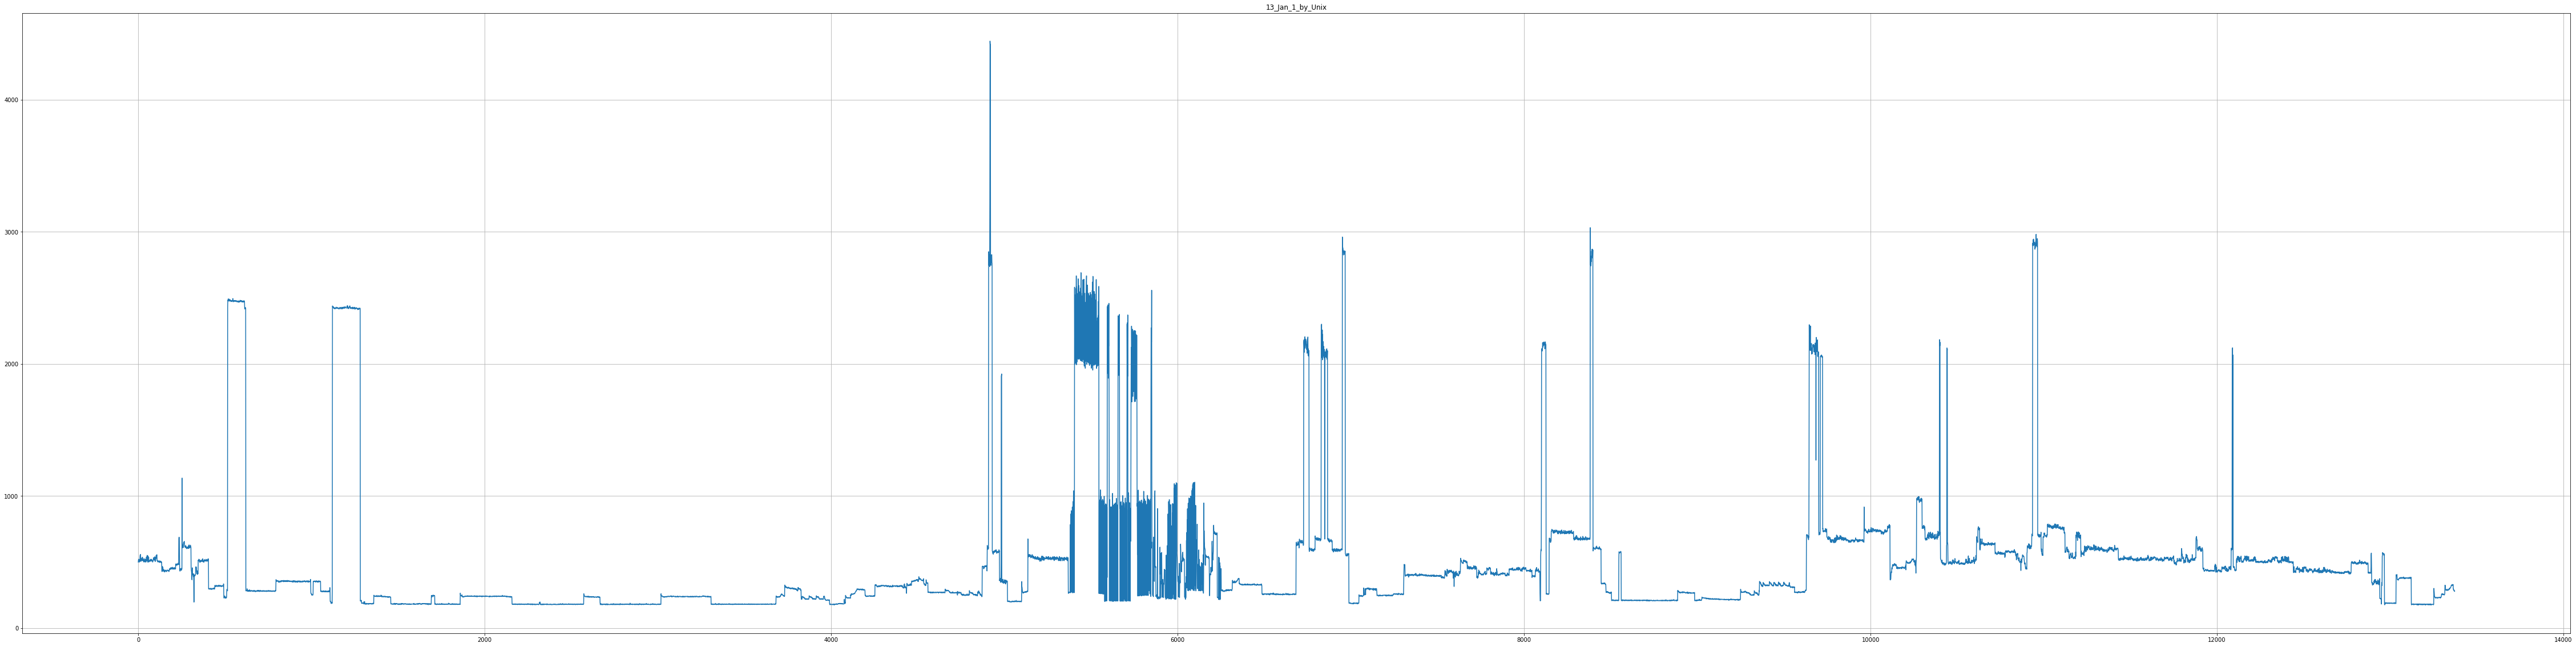

In [135]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_Unix")
plt.plot(range(len(Day_data)), Day_data["Watt"])
plt.savefig('./13_Jan_1_by_Unix.png')
plt.show()

In [131]:
total_watt_list=[]
H_list=list(range(24))
M_list=list(range(60))

i=0
i2=0
i3=0

while(i<len(Day_data)):
    list1 = Day_data.loc[i].values.tolist()
    date = str(list1[2])
    M=int(date[-5:-3])
    H=int(date[-8:-6])
    watt_list=[]
    
    while(H<24):
        print("여기래요", i, i2, i3, H, M)
        list1 = Day_data.loc[i].values.tolist()
        date = str(list1[2])
        M=int(date[-5:-3])
        H=int(date[-8:-6])
        watt_list=[]
        
        while(M<60):
            try:
                list1 = Day_data.loc[i].values.tolist()
                date = str(list1[2])
                M=int(date[-5:-3])

                if i3==60:
                    i2+=1
                    i3=0
                    break

                else:
                    try:
                        if(M==M_list[i3] and H==H_list[i2]):
                            print("수집", i, i2, i3, date, list1[3])
                            watt_list.append(list1[3])
                            i+=1

                        if(M!=M_list[i3]and H==H_list[i2]):
                            print("확인", i, i2, i3, date, watt_list, "이전 분대 값들임")
                            total_watt_list.append(max(watt_list))
                            watt_list=[]
                            i3+=1
                    except:
                        print("예외처리됨!!")
                        print(M, H, i, i2, i3)
                        total_watt_list.append(0)
                        i3+=1
            except:
                total_watt_list.append(max(watt_list))
                break


print(total_watt_list)

여기래요 0 0 0 0 0
수집 0 0 0 2013-01-01 00:00:07 500
수집 1 0 0 2013-01-01 00:00:13 515
수집 2 0 0 2013-01-01 00:00:19 522
수집 3 0 0 2013-01-01 00:00:26 508
수집 4 0 0 2013-01-01 00:00:32 502
수집 5 0 0 2013-01-01 00:00:38 507
수집 6 0 0 2013-01-01 00:00:44 508
수집 7 0 0 2013-01-01 00:00:50 500
수집 8 0 0 2013-01-01 00:00:56 517
확인 9 0 0 2013-01-01 00:01:02 [500, 515, 522, 508, 502, 507, 508, 500, 517] 이전 분대 값들임
수집 9 0 1 2013-01-01 00:01:02 505
수집 10 0 1 2013-01-01 00:01:08 538
수집 11 0 1 2013-01-01 00:01:15 551
수집 12 0 1 2013-01-01 00:01:21 530
수집 13 0 1 2013-01-01 00:01:27 558
수집 14 0 1 2013-01-01 00:01:33 522
수집 15 0 1 2013-01-01 00:01:39 514
수집 16 0 1 2013-01-01 00:01:45 505
수집 17 0 1 2013-01-01 00:01:52 511
수집 18 0 1 2013-01-01 00:01:58 517
확인 19 0 1 2013-01-01 00:02:04 [505, 538, 551, 530, 558, 522, 514, 505, 511, 517] 이전 분대 값들임
수집 19 0 2 2013-01-01 00:02:04 519
수집 20 0 2 2013-01-01 00:02:10 529
수집 21 0 2 2013-01-01 00:02:16 512
수집 22 0 2 2013-01-01 00:02:22 530
수집 23 0 2 2013-01-01 00:02:28 513
수집 

수집 314 0 34 2013-01-01 00:34:38 405
수집 315 0 34 2013-01-01 00:34:44 413
수집 316 0 34 2013-01-01 00:34:50 404
수집 317 0 34 2013-01-01 00:34:56 399
확인 318 0 34 2013-01-01 00:35:02 [418, 403, 366, 429, 457, 408, 405, 413, 404, 399] 이전 분대 값들임
수집 318 0 35 2013-01-01 00:35:02 390
수집 319 0 35 2013-01-01 00:35:09 409
수집 320 0 35 2013-01-01 00:35:15 410
수집 321 0 35 2013-01-01 00:35:21 198
수집 322 0 35 2013-01-01 00:35:27 197
수집 323 0 35 2013-01-01 00:35:33 400
수집 324 0 35 2013-01-01 00:35:39 399
수집 325 0 35 2013-01-01 00:35:45 402
수집 326 0 35 2013-01-01 00:35:52 393
수집 327 0 35 2013-01-01 00:35:58 398
확인 328 0 35 2013-01-01 00:36:04 [390, 409, 410, 198, 197, 400, 399, 402, 393, 398] 이전 분대 값들임
수집 328 0 36 2013-01-01 00:36:04 399
수집 329 0 36 2013-01-01 00:36:10 400
수집 330 0 36 2013-01-01 00:36:16 405
수집 331 0 36 2013-01-01 00:36:22 420
수집 332 0 36 2013-01-01 00:36:28 463
수집 333 0 36 2013-01-01 00:36:35 451
수집 334 0 36 2013-01-01 00:36:41 464
수집 335 0 36 2013-01-01 00:36:47 460
수집 336 0 36 2013-01-01

수집 656 1 10 2013-01-01 01:10:35 281
수집 657 1 10 2013-01-01 01:10:41 280
수집 658 1 10 2013-01-01 01:10:48 281
수집 659 1 10 2013-01-01 01:10:54 281
확인 660 1 10 2013-01-01 01:11:00 [282, 282, 282, 286, 284, 281, 280, 281, 281] 이전 분대 값들임
수집 660 1 11 2013-01-01 01:11:00 284
수집 661 1 11 2013-01-01 01:11:06 282
수집 662 1 11 2013-01-01 01:11:12 277
수집 663 1 11 2013-01-01 01:11:18 282
수집 664 1 11 2013-01-01 01:11:25 280
수집 665 1 11 2013-01-01 01:11:31 281
수집 666 1 11 2013-01-01 01:11:37 285
수집 667 1 11 2013-01-01 01:11:43 279
수집 668 1 11 2013-01-01 01:11:49 283
수집 669 1 11 2013-01-01 01:11:55 278
확인 670 1 11 2013-01-01 01:12:01 [284, 282, 277, 282, 280, 281, 285, 279, 283, 278] 이전 분대 값들임
수집 670 1 12 2013-01-01 01:12:01 285
수집 671 1 12 2013-01-01 01:12:08 280
수집 672 1 12 2013-01-01 01:12:14 278
수집 673 1 12 2013-01-01 01:12:20 283
수집 674 1 12 2013-01-01 01:12:26 278
수집 675 1 12 2013-01-01 01:12:32 277
수집 676 1 12 2013-01-01 01:12:38 278
수집 677 1 12 2013-01-01 01:12:45 282
수집 678 1 12 2013-01-01 01:1

수집 1010 1 48 2013-01-01 01:48:22 350
수집 1011 1 48 2013-01-01 01:48:28 355
수집 1012 1 48 2013-01-01 01:48:35 356
수집 1013 1 48 2013-01-01 01:48:41 351
수집 1014 1 48 2013-01-01 01:48:47 355
수집 1015 1 48 2013-01-01 01:48:53 353
수집 1016 1 48 2013-01-01 01:48:59 355
확인 1017 1 48 2013-01-01 01:49:06 [249, 254, 253, 350, 355, 356, 351, 355, 353, 355] 이전 분대 값들임
수집 1017 1 49 2013-01-01 01:49:06 356
수집 1018 1 49 2013-01-01 01:49:12 352
수집 1019 1 49 2013-01-01 01:49:18 357
수집 1020 1 49 2013-01-01 01:49:24 353
수집 1021 1 49 2013-01-01 01:49:30 356
수집 1022 1 49 2013-01-01 01:49:36 351
수집 1023 1 49 2013-01-01 01:49:42 350
수집 1024 1 49 2013-01-01 01:49:49 353
수집 1025 1 49 2013-01-01 01:49:55 349
확인 1026 1 49 2013-01-01 01:50:01 [356, 352, 357, 353, 356, 351, 350, 353, 349] 이전 분대 값들임
수집 1026 1 50 2013-01-01 01:50:01 354
수집 1027 1 50 2013-01-01 01:50:07 358
수집 1028 1 50 2013-01-01 01:50:13 356
수집 1029 1 50 2013-01-01 01:50:19 356
수집 1030 1 50 2013-01-01 01:50:25 357
수집 1031 1 50 2013-01-01 01:50:31 351
수집 

수집 1346 2 23 2013-01-01 02:23:56 185
확인 1347 2 23 2013-01-01 02:24:02 [186, 187, 186, 184, 185, 183, 185, 185, 187, 185] 이전 분대 값들임
수집 1347 2 24 2013-01-01 02:24:02 183
수집 1348 2 24 2013-01-01 02:24:08 182
수집 1349 2 24 2013-01-01 02:24:14 181
수집 1350 2 24 2013-01-01 02:24:21 186
수집 1351 2 24 2013-01-01 02:24:27 186
수집 1352 2 24 2013-01-01 02:24:33 184
수집 1353 2 24 2013-01-01 02:24:39 184
수집 1354 2 24 2013-01-01 02:24:45 187
수집 1355 2 24 2013-01-01 02:24:51 183
수집 1356 2 24 2013-01-01 02:24:57 185
확인 1357 2 24 2013-01-01 02:25:03 [183, 182, 181, 186, 186, 184, 184, 187, 183, 185] 이전 분대 값들임
수집 1357 2 25 2013-01-01 02:25:03 191
수집 1358 2 25 2013-01-01 02:25:10 186
수집 1359 2 25 2013-01-01 02:25:22 185
수집 1360 2 25 2013-01-01 02:25:40 249
수집 1361 2 25 2013-01-01 02:25:46 248
수집 1362 2 25 2013-01-01 02:25:53 244
수집 1363 2 25 2013-01-01 02:25:59 244
확인 1364 2 25 2013-01-01 02:26:05 [191, 186, 185, 249, 248, 244, 244] 이전 분대 값들임
수집 1364 2 26 2013-01-01 02:26:05 243
수집 1365 2 26 2013-01-01 02:26:

확인 1675 2 58 2013-01-01 02:59:04 [185, 186, 181, 181, 186, 184, 180, 184, 184, 177] 이전 분대 값들임
수집 1675 2 59 2013-01-01 02:59:04 183
수집 1676 2 59 2013-01-01 02:59:10 185
수집 1677 2 59 2013-01-01 02:59:16 184
수집 1678 2 59 2013-01-01 02:59:22 182
수집 1679 2 59 2013-01-01 02:59:28 186
수집 1680 2 59 2013-01-01 02:59:35 182
수집 1681 2 59 2013-01-01 02:59:41 184
수집 1682 2 59 2013-01-01 02:59:47 181
수집 1683 2 59 2013-01-01 02:59:53 181
수집 1684 2 59 2013-01-01 02:59:59 183
확인 1685 2 59 2013-01-01 03:00:05 [183, 185, 184, 182, 186, 182, 184, 181, 181, 183] 이전 분대 값들임
여기래요 1685 3 0 2 0
수집 1685 3 0 2013-01-01 03:00:05 181
수집 1686 3 0 2013-01-01 03:00:11 184
수집 1687 3 0 2013-01-01 03:00:17 182
수집 1688 3 0 2013-01-01 03:00:24 184
수집 1689 3 0 2013-01-01 03:00:30 180
수집 1690 3 0 2013-01-01 03:00:36 180
수집 1691 3 0 2013-01-01 03:00:42 183
수집 1692 3 0 2013-01-01 03:00:48 247
수집 1693 3 0 2013-01-01 03:00:54 234
확인 1694 3 0 2013-01-01 03:01:00 [181, 184, 182, 184, 180, 180, 183, 247, 234] 이전 분대 값들임
수집 1694 3 1 

수집 1990 3 32 2013-01-01 03:32:23 243
수집 1991 3 32 2013-01-01 03:32:29 241
수집 1992 3 32 2013-01-01 03:32:35 243
수집 1993 3 32 2013-01-01 03:32:41 242
수집 1994 3 32 2013-01-01 03:32:48 242
수집 1995 3 32 2013-01-01 03:32:54 242
확인 1996 3 32 2013-01-01 03:33:00 [241, 243, 241, 243, 242, 242, 242] 이전 분대 값들임
수집 1996 3 33 2013-01-01 03:33:00 240
수집 1997 3 33 2013-01-01 03:33:06 241
수집 1998 3 33 2013-01-01 03:33:12 241
수집 1999 3 33 2013-01-01 03:33:18 242
수집 2000 3 33 2013-01-01 03:33:25 240
수집 2001 3 33 2013-01-01 03:33:31 241
수집 2002 3 33 2013-01-01 03:33:37 238
수집 2003 3 33 2013-01-01 03:33:49 242
수집 2004 3 33 2013-01-01 03:33:55 244
확인 2005 3 33 2013-01-01 03:34:01 [240, 241, 241, 242, 240, 241, 238, 242, 244] 이전 분대 값들임
수집 2005 3 34 2013-01-01 03:34:01 240
수집 2006 3 34 2013-01-01 03:34:07 240
수집 2007 3 34 2013-01-01 03:34:13 240
수집 2008 3 34 2013-01-01 03:34:20 244
수집 2009 3 34 2013-01-01 03:34:26 242
수집 2010 3 34 2013-01-01 03:34:32 242
수집 2011 3 34 2013-01-01 03:34:38 240
수집 2012 3 34 2013-

수집 2336 4 9 2013-01-01 04:09:35 179
수집 2337 4 9 2013-01-01 04:09:42 179
수집 2338 4 9 2013-01-01 04:09:48 182
수집 2339 4 9 2013-01-01 04:09:54 178
확인 2340 4 9 2013-01-01 04:10:00 [181, 178, 182, 178, 178, 179, 179, 182, 178] 이전 분대 값들임
수집 2340 4 10 2013-01-01 04:10:00 178
수집 2341 4 10 2013-01-01 04:10:06 183
수집 2342 4 10 2013-01-01 04:10:12 179
수집 2343 4 10 2013-01-01 04:10:18 178
수집 2344 4 10 2013-01-01 04:10:25 179
수집 2345 4 10 2013-01-01 04:10:31 179
수집 2346 4 10 2013-01-01 04:10:37 181
수집 2347 4 10 2013-01-01 04:10:43 181
수집 2348 4 10 2013-01-01 04:10:49 180
수집 2349 4 10 2013-01-01 04:10:55 181
확인 2350 4 10 2013-01-01 04:11:01 [178, 183, 179, 178, 179, 179, 181, 181, 180, 181] 이전 분대 값들임
수집 2350 4 11 2013-01-01 04:11:01 180
수집 2351 4 11 2013-01-01 04:11:08 179
수집 2352 4 11 2013-01-01 04:11:14 181
수집 2353 4 11 2013-01-01 04:11:20 181
수집 2354 4 11 2013-01-01 04:11:26 181
수집 2355 4 11 2013-01-01 04:11:32 180
수집 2356 4 11 2013-01-01 04:11:39 178
수집 2357 4 11 2013-01-01 04:11:45 178
수집 2358 

수집 2669 4 44 2013-01-01 04:44:57 181
확인 2670 4 44 2013-01-01 04:45:03 [232, 237, 234, 233, 235, 235, 194, 178, 177, 181] 이전 분대 값들임
수집 2670 4 45 2013-01-01 04:45:03 186
수집 2671 4 45 2013-01-01 04:45:10 182
수집 2672 4 45 2013-01-01 04:45:16 182
수집 2673 4 45 2013-01-01 04:45:22 180
수집 2674 4 45 2013-01-01 04:45:28 183
수집 2675 4 45 2013-01-01 04:45:34 182
수집 2676 4 45 2013-01-01 04:45:40 177
수집 2677 4 45 2013-01-01 04:45:46 176
수집 2678 4 45 2013-01-01 04:45:53 180
수집 2679 4 45 2013-01-01 04:45:59 178
확인 2680 4 45 2013-01-01 04:46:05 [186, 182, 182, 180, 183, 182, 177, 176, 180, 178] 이전 분대 값들임
수집 2680 4 46 2013-01-01 04:46:05 181
수집 2681 4 46 2013-01-01 04:46:11 182
수집 2682 4 46 2013-01-01 04:46:17 180
수집 2683 4 46 2013-01-01 04:46:23 179
수집 2684 4 46 2013-01-01 04:46:30 179
수집 2685 4 46 2013-01-01 04:46:36 179
수집 2686 4 46 2013-01-01 04:46:42 178
수집 2687 4 46 2013-01-01 04:46:48 183
수집 2688 4 46 2013-01-01 04:46:54 180
확인 2689 4 46 2013-01-01 04:47:00 [181, 182, 180, 179, 179, 179, 178, 183

수집 2997 5 19 2013-01-01 05:19:49 181
수집 2998 5 19 2013-01-01 05:19:55 181
확인 2999 5 19 2013-01-01 05:20:02 [179, 178, 179, 179, 178, 179, 181, 179, 181, 181] 이전 분대 값들임
수집 2999 5 20 2013-01-01 05:20:02 179
수집 3000 5 20 2013-01-01 05:20:08 179
수집 3001 5 20 2013-01-01 05:20:14 180
수집 3002 5 20 2013-01-01 05:20:20 182
수집 3003 5 20 2013-01-01 05:20:26 183
수집 3004 5 20 2013-01-01 05:20:33 179
수집 3005 5 20 2013-01-01 05:20:39 179
수집 3006 5 20 2013-01-01 05:20:45 178
수집 3007 5 20 2013-01-01 05:20:51 181
수집 3008 5 20 2013-01-01 05:20:57 180
확인 3009 5 20 2013-01-01 05:21:03 [179, 179, 180, 182, 183, 179, 179, 178, 181, 180] 이전 분대 값들임
수집 3009 5 21 2013-01-01 05:21:03 183
수집 3010 5 21 2013-01-01 05:21:09 179
수집 3011 5 21 2013-01-01 05:21:16 181
수집 3012 5 21 2013-01-01 05:21:22 179
수집 3013 5 21 2013-01-01 05:21:28 181
수집 3014 5 21 2013-01-01 05:21:34 179
수집 3015 5 21 2013-01-01 05:21:40 182
수집 3016 5 21 2013-01-01 05:21:46 179
수집 3017 5 21 2013-01-01 05:21:53 181
확인 3018 5 21 2013-01-01 05:22:00 [1

수집 3340 5 56 2013-01-01 05:56:53 182
수집 3341 5 56 2013-01-01 05:56:59 179
확인 3342 5 56 2013-01-01 05:57:05 [187, 180, 180, 181, 182, 179, 181, 178, 182, 179] 이전 분대 값들임
수집 3342 5 57 2013-01-01 05:57:05 180
수집 3343 5 57 2013-01-01 05:57:11 182
수집 3344 5 57 2013-01-01 05:57:17 182
수집 3345 5 57 2013-01-01 05:57:23 181
수집 3346 5 57 2013-01-01 05:57:29 179
수집 3347 5 57 2013-01-01 05:57:36 180
수집 3348 5 57 2013-01-01 05:57:42 179
수집 3349 5 57 2013-01-01 05:57:48 183
수집 3350 5 57 2013-01-01 05:57:54 178
확인 3351 5 57 2013-01-01 05:58:00 [180, 182, 182, 181, 179, 180, 179, 183, 178] 이전 분대 값들임
수집 3351 5 58 2013-01-01 05:58:00 186
수집 3352 5 58 2013-01-01 05:58:07 186
수집 3353 5 58 2013-01-01 05:58:13 180
수집 3354 5 58 2013-01-01 05:58:19 181
수집 3355 5 58 2013-01-01 05:58:25 183
수집 3356 5 58 2013-01-01 05:58:31 184
수집 3357 5 58 2013-01-01 05:58:37 182
수집 3358 5 58 2013-01-01 05:58:44 180
수집 3359 5 58 2013-01-01 05:58:50 182
수집 3360 5 58 2013-01-01 05:58:56 181
확인 3361 5 58 2013-01-01 05:59:02 [186, 1

수집 3669 6 31 2013-01-01 06:31:46 182
수집 3670 6 31 2013-01-01 06:31:52 182
수집 3671 6 31 2013-01-01 06:31:58 181
확인 3672 6 31 2013-01-01 06:32:04 [182, 182, 182, 181, 182, 183, 182, 182, 181] 이전 분대 값들임
수집 3672 6 32 2013-01-01 06:32:04 182
수집 3673 6 32 2013-01-01 06:32:10 183
수집 3674 6 32 2013-01-01 06:32:16 180
수집 3675 6 32 2013-01-01 06:32:22 180
수집 3676 6 32 2013-01-01 06:32:29 182
수집 3677 6 32 2013-01-01 06:32:35 182
수집 3678 6 32 2013-01-01 06:32:41 183
수집 3679 6 32 2013-01-01 06:32:47 180
수집 3680 6 32 2013-01-01 06:32:53 186
수집 3681 6 32 2013-01-01 06:32:59 184
확인 3682 6 32 2013-01-01 06:33:06 [182, 183, 180, 180, 182, 182, 183, 180, 186, 184] 이전 분대 값들임
수집 3682 6 33 2013-01-01 06:33:06 243
수집 3683 6 33 2013-01-01 06:33:12 242
수집 3684 6 33 2013-01-01 06:33:18 241
수집 3685 6 33 2013-01-01 06:33:24 241
수집 3686 6 33 2013-01-01 06:33:30 237
수집 3687 6 33 2013-01-01 06:33:36 234
수집 3688 6 33 2013-01-01 06:33:43 237
수집 3689 6 33 2013-01-01 06:33:49 237
수집 3690 6 33 2013-01-01 06:33:55 232
확인 

수집 4041 7 10 2013-01-01 07:10:59 185
확인 4042 7 10 2013-01-01 07:11:05 [185, 182, 181, 181, 180, 180, 181, 184, 183, 185] 이전 분대 값들임
수집 4042 7 11 2013-01-01 07:11:05 186
수집 4043 7 11 2013-01-01 07:11:11 184
수집 4044 7 11 2013-01-01 07:11:17 186
수집 4045 7 11 2013-01-01 07:11:24 186
수집 4046 7 11 2013-01-01 07:11:30 184
수집 4047 7 11 2013-01-01 07:11:36 186
수집 4048 7 11 2013-01-01 07:11:42 184
수집 4049 7 11 2013-01-01 07:11:48 186
수집 4050 7 11 2013-01-01 07:11:54 187
확인 4051 7 11 2013-01-01 07:12:01 [186, 184, 186, 186, 184, 186, 184, 186, 187] 이전 분대 값들임
수집 4051 7 12 2013-01-01 07:12:01 188
수집 4052 7 12 2013-01-01 07:12:07 186
수집 4053 7 12 2013-01-01 07:12:13 184
수집 4054 7 12 2013-01-01 07:12:19 186
수집 4055 7 12 2013-01-01 07:12:25 184
수집 4056 7 12 2013-01-01 07:12:31 186
수집 4057 7 12 2013-01-01 07:12:38 183
수집 4058 7 12 2013-01-01 07:12:44 184
수집 4059 7 12 2013-01-01 07:12:50 186
수집 4060 7 12 2013-01-01 07:12:56 184
확인 4061 7 12 2013-01-01 07:13:08 [188, 186, 184, 186, 184, 186, 183, 184, 186

수집 4369 7 45 2013-01-01 07:45:36 316
수집 4370 7 45 2013-01-01 07:45:42 318
수집 4371 7 45 2013-01-01 07:45:48 316
수집 4372 7 45 2013-01-01 07:45:54 320
확인 4373 7 45 2013-01-01 07:46:00 [319, 318, 320, 319, 321, 316, 318, 316, 320] 이전 분대 값들임
수집 4373 7 46 2013-01-01 07:46:00 321
수집 4374 7 46 2013-01-01 07:46:06 316
수집 4375 7 46 2013-01-01 07:46:12 318
수집 4376 7 46 2013-01-01 07:46:19 320
수집 4377 7 46 2013-01-01 07:46:25 321
수집 4378 7 46 2013-01-01 07:46:31 320
수집 4379 7 46 2013-01-01 07:46:37 323
수집 4380 7 46 2013-01-01 07:46:43 315
수집 4381 7 46 2013-01-01 07:46:49 315
수집 4382 7 46 2013-01-01 07:46:56 313
확인 4383 7 46 2013-01-01 07:47:02 [321, 316, 318, 320, 321, 320, 323, 315, 315, 313] 이전 분대 값들임
수집 4383 7 47 2013-01-01 07:47:02 321
수집 4384 7 47 2013-01-01 07:47:08 320
수집 4385 7 47 2013-01-01 07:47:14 315
수집 4386 7 47 2013-01-01 07:47:20 320
수집 4387 7 47 2013-01-01 07:47:26 316
수집 4388 7 47 2013-01-01 07:47:33 314
수집 4389 7 47 2013-01-01 07:47:39 315
수집 4390 7 47 2013-01-01 07:47:45 314
수집 

수집 4665 8 16 2013-01-01 08:16:48 281
수집 4666 8 16 2013-01-01 08:16:54 285
확인 4667 8 16 2013-01-01 08:17:00 [295, 291, 292, 291, 283, 283, 285, 281, 285] 이전 분대 값들임
수집 4667 8 17 2013-01-01 08:17:00 282
수집 4668 8 17 2013-01-01 08:17:06 288
수집 4669 8 17 2013-01-01 08:17:13 285
수집 4670 8 17 2013-01-01 08:17:19 282
수집 4671 8 17 2013-01-01 08:17:25 285
수집 4672 8 17 2013-01-01 08:17:31 283
수집 4673 8 17 2013-01-01 08:17:37 284
수집 4674 8 17 2013-01-01 08:17:43 283
수집 4675 8 17 2013-01-01 08:17:50 285
수집 4676 8 17 2013-01-01 08:17:56 283
확인 4677 8 17 2013-01-01 08:18:08 [282, 288, 285, 282, 285, 283, 284, 283, 285, 283] 이전 분대 값들임
수집 4677 8 18 2013-01-01 08:18:08 286
수집 4678 8 18 2013-01-01 08:18:14 284
수집 4679 8 18 2013-01-01 08:18:20 283
수집 4680 8 18 2013-01-01 08:18:27 277
수집 4681 8 18 2013-01-01 08:18:33 275
수집 4682 8 18 2013-01-01 08:18:39 277
수집 4683 8 18 2013-01-01 08:18:45 277
수집 4684 8 18 2013-01-01 08:18:51 277
수집 4685 8 18 2013-01-01 08:18:57 269
확인 4686 8 18 2013-01-01 08:19:03 [286, 2

수집 5047 8 58 2013-01-01 08:58:12 203
수집 5048 8 58 2013-01-01 08:58:19 201
수집 5049 8 58 2013-01-01 08:58:25 203
수집 5050 8 58 2013-01-01 08:58:31 199
수집 5051 8 58 2013-01-01 08:58:37 202
수집 5052 8 58 2013-01-01 08:58:43 201
수집 5053 8 58 2013-01-01 08:58:49 202
수집 5054 8 58 2013-01-01 08:58:55 200
확인 5055 8 58 2013-01-01 08:59:02 [200, 205, 203, 201, 203, 199, 202, 201, 202, 200] 이전 분대 값들임
수집 5055 8 59 2013-01-01 08:59:02 203
수집 5056 8 59 2013-01-01 08:59:08 200
수집 5057 8 59 2013-01-01 08:59:14 199
수집 5058 8 59 2013-01-01 08:59:20 200
수집 5059 8 59 2013-01-01 08:59:26 206
수집 5060 8 59 2013-01-01 08:59:51 202
수집 5061 8 59 2013-01-01 08:59:57 201
확인 5062 8 59 2013-01-01 09:00:03 [203, 200, 199, 200, 206, 202, 201] 이전 분대 값들임
여기래요 5062 9 0 8 0
수집 5062 9 0 2013-01-01 09:00:03 204
수집 5063 9 0 2013-01-01 09:00:09 204
수집 5064 9 0 2013-01-01 09:00:16 200
수집 5065 9 0 2013-01-01 09:00:22 200
수집 5066 9 0 2013-01-01 09:00:28 203
수집 5067 9 0 2013-01-01 09:00:34 202
수집 5068 9 0 2013-01-01 09:00:40 210
수집

수집 5364 9 33 2013-01-01 09:33:11 510
수집 5365 9 33 2013-01-01 09:33:24 529
수집 5366 9 33 2013-01-01 09:33:30 519
수집 5367 9 33 2013-01-01 09:33:42 534
수집 5368 9 33 2013-01-01 09:33:48 530
수집 5369 9 33 2013-01-01 09:33:54 263
확인 5370 9 33 2013-01-01 09:34:13 [519, 510, 529, 519, 534, 530, 263] 이전 분대 값들임
수집 5370 9 34 2013-01-01 09:34:13 263
수집 5371 9 34 2013-01-01 09:34:19 273
수집 5372 9 34 2013-01-01 09:34:25 269
수집 5373 9 34 2013-01-01 09:34:31 273
수집 5374 9 34 2013-01-01 09:34:37 273
수집 5375 9 34 2013-01-01 09:34:44 270
수집 5376 9 34 2013-01-01 09:34:50 268
수집 5377 9 34 2013-01-01 09:34:56 271
확인 5378 9 34 2013-01-01 09:35:02 [263, 273, 269, 273, 273, 270, 268, 271] 이전 분대 값들임
수집 5378 9 35 2013-01-01 09:35:02 269
수집 5379 9 35 2013-01-01 09:35:08 271
수집 5380 9 35 2013-01-01 09:35:14 420
수집 5381 9 35 2013-01-01 09:35:20 785
수집 5382 9 35 2013-01-01 09:35:26 268
수집 5383 9 35 2013-01-01 09:35:33 272
수집 5384 9 35 2013-01-01 09:35:39 865
수집 5385 9 35 2013-01-01 09:35:45 272
수집 5386 9 35 2013-01-01

확인 5676 10 6 2013-01-01 10:07:05 [951, 937, 207, 917, 203, 957, 910] 이전 분대 값들임
수집 5676 10 7 2013-01-01 10:07:05 910
수집 5677 10 7 2013-01-01 10:07:11 900
수집 5678 10 7 2013-01-01 10:07:17 887
수집 5679 10 7 2013-01-01 10:07:24 927
수집 5680 10 7 2013-01-01 10:07:30 204
수집 5681 10 7 2013-01-01 10:07:36 921
수집 5682 10 7 2013-01-01 10:07:42 619
수집 5683 10 7 2013-01-01 10:07:48 1003
수집 5684 10 7 2013-01-01 10:07:54 918
확인 5685 10 7 2013-01-01 10:08:01 [910, 900, 887, 927, 204, 921, 619, 1003, 918] 이전 분대 값들임
수집 5685 10 8 2013-01-01 10:08:01 203
수집 5686 10 8 2013-01-01 10:08:07 900
수집 5687 10 8 2013-01-01 10:08:13 205
수집 5688 10 8 2013-01-01 10:08:19 951
수집 5689 10 8 2013-01-01 10:08:25 910
수집 5690 10 8 2013-01-01 10:08:31 219
수집 5691 10 8 2013-01-01 10:08:50 942
수집 5692 10 8 2013-01-01 10:08:56 897
확인 5693 10 8 2013-01-01 10:09:02 [203, 900, 205, 951, 910, 219, 942, 897] 이전 분대 값들임
수집 5693 10 9 2013-01-01 10:09:02 664
수집 5694 10 9 2013-01-01 10:09:08 907
수집 5695 10 9 2013-01-01 10:09:14 205
수집 569

수집 6017 10 44 2013-01-01 10:44:31 636
수집 6018 10 44 2013-01-01 10:44:37 593
수집 6019 10 44 2013-01-01 10:44:43 485
수집 6020 10 44 2013-01-01 10:44:49 453
수집 6021 10 44 2013-01-01 10:44:56 432
확인 6022 10 44 2013-01-01 10:45:02 [360, 341, 342, 347, 346, 636, 593, 485, 453, 432] 이전 분대 값들임
수집 6022 10 45 2013-01-01 10:45:02 435
수집 6023 10 45 2013-01-01 10:45:08 426
수집 6024 10 45 2013-01-01 10:45:14 509
수집 6025 10 45 2013-01-01 10:45:20 503
수집 6026 10 45 2013-01-01 10:45:27 519
수집 6027 10 45 2013-01-01 10:45:33 548
수집 6028 10 45 2013-01-01 10:45:39 565
수집 6029 10 45 2013-01-01 10:45:45 572
수집 6030 10 45 2013-01-01 10:45:51 575
수집 6031 10 45 2013-01-01 10:45:57 506
확인 6032 10 45 2013-01-01 10:46:04 [435, 426, 509, 503, 519, 548, 565, 572, 575, 506] 이전 분대 값들임
수집 6032 10 46 2013-01-01 10:46:04 532
수집 6033 10 46 2013-01-01 10:46:10 516
수집 6034 10 46 2013-01-01 10:46:16 516
수집 6035 10 46 2013-01-01 10:46:22 521
수집 6036 10 46 2013-01-01 10:46:28 526
수집 6037 10 46 2013-01-01 10:46:34 518
수집 6038 10 4

수집 6347 11 20 2013-01-01 11:20:00 365
수집 6348 11 20 2013-01-01 11:20:06 371
수집 6349 11 20 2013-01-01 11:20:25 373
수집 6350 11 20 2013-01-01 11:20:31 376
수집 6351 11 20 2013-01-01 11:20:37 375
수집 6352 11 20 2013-01-01 11:20:43 370
수집 6353 11 20 2013-01-01 11:20:49 372
수집 6354 11 20 2013-01-01 11:20:55 377
확인 6355 11 20 2013-01-01 11:21:02 [365, 371, 373, 376, 375, 370, 372, 377] 이전 분대 값들임
수집 6355 11 21 2013-01-01 11:21:02 374
수집 6356 11 21 2013-01-01 11:21:08 336
수집 6357 11 21 2013-01-01 11:21:14 342
수집 6358 11 21 2013-01-01 11:21:20 334
수집 6359 11 21 2013-01-01 11:21:26 339
수집 6360 11 21 2013-01-01 11:21:32 336
수집 6361 11 21 2013-01-01 11:21:38 329
수집 6362 11 21 2013-01-01 11:21:45 332
수집 6363 11 21 2013-01-01 11:21:51 333
수집 6364 11 21 2013-01-01 11:21:57 333
확인 6365 11 21 2013-01-01 11:22:03 [374, 336, 342, 334, 339, 336, 329, 332, 333, 333] 이전 분대 값들임
수집 6365 11 22 2013-01-01 11:22:03 331
수집 6366 11 22 2013-01-01 11:22:09 331
수집 6367 11 22 2013-01-01 11:22:15 331
수집 6368 11 22 2013-01-

수집 6724 12 0 2013-01-01 12:00:25 649
수집 6725 12 0 2013-01-01 12:00:31 630
수집 6726 12 0 2013-01-01 12:00:37 626
수집 6727 12 0 2013-01-01 12:00:43 635
수집 6728 12 0 2013-01-01 12:00:56 2161
확인 6729 12 0 2013-01-01 12:01:02 [664, 650, 643, 652, 649, 630, 626, 635, 2161] 이전 분대 값들임
수집 6729 12 1 2013-01-01 12:01:02 2180
수집 6730 12 1 2013-01-01 12:01:07 2129
수집 6731 12 1 2013-01-01 12:01:13 2088
수집 6732 12 1 2013-01-01 12:01:19 2187
수집 6733 12 1 2013-01-01 12:01:25 2116
수집 6734 12 1 2013-01-01 12:01:31 2123
수집 6735 12 1 2013-01-01 12:01:37 2206
수집 6736 12 1 2013-01-01 12:01:43 2121
수집 6737 12 1 2013-01-01 12:01:49 2144
수집 6738 12 1 2013-01-01 12:01:55 2161
확인 6739 12 1 2013-01-01 12:02:01 [2180, 2129, 2088, 2187, 2116, 2123, 2206, 2121, 2144, 2161] 이전 분대 값들임
수집 6739 12 2 2013-01-01 12:02:01 2188
수집 6740 12 2 2013-01-01 12:02:07 2180
수집 6741 12 2 2013-01-01 12:02:13 2177
수집 6742 12 2 2013-01-01 12:02:19 2172
수집 6743 12 2 2013-01-01 12:02:25 2133
수집 6744 12 2 2013-01-01 12:02:31 2123
수집 6745 12 2

수집 7038 12 33 2013-01-01 12:33:04 184
수집 7039 12 33 2013-01-01 12:33:10 186
수집 7040 12 33 2013-01-01 12:33:16 191
수집 7041 12 33 2013-01-01 12:33:22 190
수집 7042 12 33 2013-01-01 12:33:28 186
수집 7043 12 33 2013-01-01 12:33:34 186
수집 7044 12 33 2013-01-01 12:33:41 186
수집 7045 12 33 2013-01-01 12:33:47 189
수집 7046 12 33 2013-01-01 12:33:53 190
수집 7047 12 33 2013-01-01 12:33:59 252
확인 7048 12 33 2013-01-01 12:34:05 [184, 186, 191, 190, 186, 186, 186, 189, 190, 252] 이전 분대 값들임
수집 7048 12 34 2013-01-01 12:34:05 249
수집 7049 12 34 2013-01-01 12:34:11 241
수집 7050 12 34 2013-01-01 12:34:18 244
수집 7051 12 34 2013-01-01 12:34:24 244
수집 7052 12 34 2013-01-01 12:34:30 243
수집 7053 12 34 2013-01-01 12:34:36 244
수집 7054 12 34 2013-01-01 12:34:42 243
수집 7055 12 34 2013-01-01 12:34:48 246
수집 7056 12 34 2013-01-01 12:34:54 241
확인 7057 12 34 2013-01-01 12:35:00 [249, 241, 244, 244, 243, 244, 243, 246, 241] 이전 분대 값들임
수집 7057 12 35 2013-01-01 12:35:00 248
수집 7058 12 35 2013-01-01 12:35:07 244
수집 7059 12 35 201

수집 7366 13 9 2013-01-01 13:09:08 403
수집 7367 13 9 2013-01-01 13:09:14 406
수집 7368 13 9 2013-01-01 13:09:21 403
수집 7369 13 9 2013-01-01 13:09:27 404
수집 7370 13 9 2013-01-01 13:09:33 409
수집 7371 13 9 2013-01-01 13:09:39 407
수집 7372 13 9 2013-01-01 13:09:45 400
수집 7373 13 9 2013-01-01 13:09:51 414
수집 7374 13 9 2013-01-01 13:09:57 399
확인 7375 13 9 2013-01-01 13:10:04 [401, 403, 406, 403, 404, 409, 407, 400, 414, 399] 이전 분대 값들임
수집 7375 13 10 2013-01-01 13:10:04 413
수집 7376 13 10 2013-01-01 13:10:10 412
수집 7377 13 10 2013-01-01 13:10:16 407
수집 7378 13 10 2013-01-01 13:10:22 408
수집 7379 13 10 2013-01-01 13:10:28 406
수집 7380 13 10 2013-01-01 13:10:34 397
수집 7381 13 10 2013-01-01 13:10:41 395
수집 7382 13 10 2013-01-01 13:10:47 397
수집 7383 13 10 2013-01-01 13:10:53 394
수집 7384 13 10 2013-01-01 13:10:59 401
확인 7385 13 10 2013-01-01 13:11:05 [413, 412, 407, 408, 406, 397, 395, 397, 394, 401] 이전 분대 값들임
수집 7385 13 11 2013-01-01 13:11:05 394
수집 7386 13 11 2013-01-01 13:11:11 401
수집 7387 13 11 2013-01-

수집 7700 13 45 2013-01-01 13:45:43 458
수집 7701 13 45 2013-01-01 13:45:49 446
수집 7702 13 45 2013-01-01 13:45:56 457
확인 7703 13 45 2013-01-01 13:46:02 [454, 447, 458, 455, 454, 448, 451, 458, 446, 457] 이전 분대 값들임
수집 7703 13 46 2013-01-01 13:46:02 454
수집 7704 13 46 2013-01-01 13:46:08 450
수집 7705 13 46 2013-01-01 13:46:14 457
수집 7706 13 46 2013-01-01 13:46:20 450
수집 7707 13 46 2013-01-01 13:46:26 459
수집 7708 13 46 2013-01-01 13:46:33 456
수집 7709 13 46 2013-01-01 13:46:39 472
수집 7710 13 46 2013-01-01 13:46:45 461
수집 7711 13 46 2013-01-01 13:46:51 462
수집 7712 13 46 2013-01-01 13:46:57 456
확인 7713 13 46 2013-01-01 13:47:03 [454, 450, 457, 450, 459, 456, 472, 461, 462, 456] 이전 분대 값들임
수집 7713 13 47 2013-01-01 13:47:03 463
수집 7714 13 47 2013-01-01 13:47:09 463
수집 7715 13 47 2013-01-01 13:47:16 446
수집 7716 13 47 2013-01-01 13:47:22 466
수집 7717 13 47 2013-01-01 13:47:28 471
수집 7718 13 47 2013-01-01 13:47:34 455
수집 7719 13 47 2013-01-01 13:47:40 445
수집 7720 13 47 2013-01-01 13:47:46 459
수집 7721 13 4

수집 8029 14 21 2013-01-01 14:21:22 437
수집 8030 14 21 2013-01-01 14:21:28 431
수집 8031 14 21 2013-01-01 14:21:34 431
수집 8032 14 21 2013-01-01 14:21:40 440
수집 8033 14 21 2013-01-01 14:21:46 429
수집 8034 14 21 2013-01-01 14:21:52 434
수집 8035 14 21 2013-01-01 14:21:59 427
확인 8036 14 21 2013-01-01 14:22:05 [434, 432, 432, 437, 431, 431, 440, 429, 434, 427] 이전 분대 값들임
수집 8036 14 22 2013-01-01 14:22:05 435
수집 8037 14 22 2013-01-01 14:22:11 447
수집 8038 14 22 2013-01-01 14:22:17 429
수집 8039 14 22 2013-01-01 14:22:23 437
수집 8040 14 22 2013-01-01 14:22:29 433
수집 8041 14 22 2013-01-01 14:22:36 426
수집 8042 14 22 2013-01-01 14:22:42 429
수집 8043 14 22 2013-01-01 14:22:48 429
수집 8044 14 22 2013-01-01 14:22:54 432
확인 8045 14 22 2013-01-01 14:23:00 [435, 447, 429, 437, 433, 426, 429, 429, 432] 이전 분대 값들임
수집 8045 14 23 2013-01-01 14:23:00 438
수집 8046 14 23 2013-01-01 14:23:13 383
수집 8047 14 23 2013-01-01 14:23:25 391
수집 8048 14 23 2013-01-01 14:23:31 393
수집 8049 14 23 2013-01-01 14:23:37 398
수집 8050 14 23 201

수집 8363 14 56 2013-01-01 14:56:56 666
확인 8364 14 56 2013-01-01 14:57:02 [684, 692, 686, 682, 685, 683, 668, 675, 672, 666] 이전 분대 값들임
수집 8364 14 57 2013-01-01 14:57:02 683
수집 8365 14 57 2013-01-01 14:57:08 679
수집 8366 14 57 2013-01-01 14:57:14 678
수집 8367 14 57 2013-01-01 14:57:21 671
수집 8368 14 57 2013-01-01 14:57:27 674
수집 8369 14 57 2013-01-01 14:57:33 683
수집 8370 14 57 2013-01-01 14:57:39 676
수집 8371 14 57 2013-01-01 14:57:45 673
수집 8372 14 57 2013-01-01 14:57:51 673
수집 8373 14 57 2013-01-01 14:57:57 677
확인 8374 14 57 2013-01-01 14:58:04 [683, 679, 678, 671, 674, 683, 676, 673, 673, 677] 이전 분대 값들임
수집 8374 14 58 2013-01-01 14:58:04 676
수집 8375 14 58 2013-01-01 14:58:10 680
수집 8376 14 58 2013-01-01 14:58:16 674
수집 8377 14 58 2013-01-01 14:58:22 673
수집 8378 14 58 2013-01-01 14:58:28 681
수집 8379 14 58 2013-01-01 14:58:34 684
수집 8380 14 58 2013-01-01 14:58:40 671
수집 8381 14 58 2013-01-01 14:58:47 683
수집 8382 14 58 2013-01-01 14:58:53 3032
수집 8383 14 58 2013-01-01 14:58:59 2776
확인 8384 14

수집 8690 15 31 2013-01-01 15:31:01 213
수집 8691 15 31 2013-01-01 15:31:07 211
수집 8692 15 31 2013-01-01 15:31:13 208
수집 8693 15 31 2013-01-01 15:31:19 210
수집 8694 15 31 2013-01-01 15:31:25 212
수집 8695 15 31 2013-01-01 15:31:31 209
수집 8696 15 31 2013-01-01 15:31:37 210
수집 8697 15 31 2013-01-01 15:31:43 211
수집 8698 15 31 2013-01-01 15:31:49 209
수집 8699 15 31 2013-01-01 15:31:56 211
확인 8700 15 31 2013-01-01 15:32:02 [213, 211, 208, 210, 212, 209, 210, 211, 209, 211] 이전 분대 값들임
수집 8700 15 32 2013-01-01 15:32:02 212
수집 8701 15 32 2013-01-01 15:32:08 208
수집 8702 15 32 2013-01-01 15:32:14 208
수집 8703 15 32 2013-01-01 15:32:20 209
수집 8704 15 32 2013-01-01 15:32:27 211
수집 8705 15 32 2013-01-01 15:32:33 212
수집 8706 15 32 2013-01-01 15:32:39 210
수집 8707 15 32 2013-01-01 15:32:45 208
수집 8708 15 32 2013-01-01 15:32:51 212
수집 8709 15 32 2013-01-01 15:32:57 206
확인 8710 15 32 2013-01-01 15:33:03 [212, 208, 208, 209, 211, 212, 210, 208, 212, 206] 이전 분대 값들임
수집 8710 15 33 2013-01-01 15:33:03 215
수집 8711 15 3

수집 9018 16 7 2013-01-01 16:07:59 212
확인 9019 16 7 2013-01-01 16:08:06 [210, 210, 218, 218, 210, 209, 213, 215, 210, 212] 이전 분대 값들임
수집 9019 16 8 2013-01-01 16:08:06 209
수집 9020 16 8 2013-01-01 16:08:12 211
수집 9021 16 8 2013-01-01 16:08:18 210
수집 9022 16 8 2013-01-01 16:08:24 212
수집 9023 16 8 2013-01-01 16:08:30 209
수집 9024 16 8 2013-01-01 16:08:36 213
수집 9025 16 8 2013-01-01 16:08:42 215
수집 9026 16 8 2013-01-01 16:08:49 223
수집 9027 16 8 2013-01-01 16:08:55 235
확인 9028 16 8 2013-01-01 16:09:01 [209, 211, 210, 212, 209, 213, 215, 223, 235] 이전 분대 값들임
수집 9028 16 9 2013-01-01 16:09:01 229
수집 9029 16 9 2013-01-01 16:09:13 229
수집 9030 16 9 2013-01-01 16:09:19 230
수집 9031 16 9 2013-01-01 16:09:26 229
수집 9032 16 9 2013-01-01 16:09:32 227
수집 9033 16 9 2013-01-01 16:09:38 229
수집 9034 16 9 2013-01-01 16:09:44 231
수집 9035 16 9 2013-01-01 16:09:50 230
수집 9036 16 9 2013-01-01 16:09:57 230
확인 9037 16 9 2013-01-01 16:10:03 [229, 229, 230, 229, 227, 229, 231, 230, 230] 이전 분대 값들임
수집 9037 16 10 2013-01-01 

확인 9335 16 41 2013-01-01 16:42:02 [249, 253, 251, 250, 283, 278, 277, 269, 271, 269] 이전 분대 값들임
수집 9335 16 42 2013-01-01 16:42:02 268
수집 9336 16 42 2013-01-01 16:42:08 266
수집 9337 16 42 2013-01-01 16:42:14 263
수집 9338 16 42 2013-01-01 16:42:20 270
수집 9339 16 42 2013-01-01 16:42:26 263
수집 9340 16 42 2013-01-01 16:42:32 270
수집 9341 16 42 2013-01-01 16:42:39 265
수집 9342 16 42 2013-01-01 16:42:51 268
수집 9343 16 42 2013-01-01 16:42:57 262
확인 9344 16 42 2013-01-01 16:43:03 [268, 266, 263, 270, 263, 270, 265, 268, 262] 이전 분대 값들임
수집 9344 16 43 2013-01-01 16:43:03 266
수집 9345 16 43 2013-01-01 16:43:09 268
수집 9346 16 43 2013-01-01 16:43:16 258
수집 9347 16 43 2013-01-01 16:43:22 257
수집 9348 16 43 2013-01-01 16:43:28 254
수집 9349 16 43 2013-01-01 16:43:34 262
수집 9350 16 43 2013-01-01 16:43:40 257
수집 9351 16 43 2013-01-01 16:43:47 250
수집 9352 16 43 2013-01-01 16:43:53 248
수집 9353 16 43 2013-01-01 16:43:59 251
확인 9354 16 43 2013-01-01 16:44:05 [266, 268, 258, 257, 254, 262, 257, 250, 248, 251] 이전 분대 값들

수집 9659 17 16 2013-01-01 17:16:09 2154
수집 9660 17 16 2013-01-01 17:16:15 2074
수집 9661 17 16 2013-01-01 17:16:21 2122
수집 9662 17 16 2013-01-01 17:16:27 2097
수집 9663 17 16 2013-01-01 17:16:33 2104
수집 9664 17 16 2013-01-01 17:16:39 2078
수집 9665 17 16 2013-01-01 17:16:45 2101
수집 9666 17 16 2013-01-01 17:16:51 2116
수집 9667 17 16 2013-01-01 17:16:56 2145
확인 9668 17 16 2013-01-01 17:17:02 [2141, 2154, 2074, 2122, 2097, 2104, 2078, 2101, 2116, 2145] 이전 분대 값들임
수집 9668 17 17 2013-01-01 17:17:02 2145
수집 9669 17 17 2013-01-01 17:17:08 2130
수집 9670 17 17 2013-01-01 17:17:14 2129
수집 9671 17 17 2013-01-01 17:17:20 2144
수집 9672 17 17 2013-01-01 17:17:26 2148
수집 9673 17 17 2013-01-01 17:17:32 2123
수집 9674 17 17 2013-01-01 17:17:38 2090
수집 9675 17 17 2013-01-01 17:17:44 2119
수집 9676 17 17 2013-01-01 17:17:50 2126
수집 9677 17 17 2013-01-01 17:17:56 2136
확인 9678 17 17 2013-01-01 17:18:02 [2145, 2130, 2129, 2144, 2148, 2123, 2090, 2119, 2126, 2136] 이전 분대 값들임
수집 9678 17 18 2013-01-01 17:18:02 2142
수집 9679 17

수집 9989 17 52 2013-01-01 17:52:47 729
수집 9990 17 52 2013-01-01 17:52:53 749
확인 9991 17 52 2013-01-01 17:53:00 [727, 722, 717, 736, 730, 739, 731, 729, 749] 이전 분대 값들임
수집 9991 17 53 2013-01-01 17:53:00 731
수집 9992 17 53 2013-01-01 17:53:06 729
수집 9993 17 53 2013-01-01 17:53:12 730
수집 9994 17 53 2013-01-01 17:53:18 728
수집 9995 17 53 2013-01-01 17:53:24 727
수집 9996 17 53 2013-01-01 17:53:31 736
수집 9997 17 53 2013-01-01 17:53:37 735
수집 9998 17 53 2013-01-01 17:53:43 738
수집 9999 17 53 2013-01-01 17:53:49 728
수집 10000 17 53 2013-01-01 17:53:55 747
확인 10001 17 53 2013-01-01 17:54:01 [731, 729, 730, 728, 727, 736, 735, 738, 728, 747] 이전 분대 값들임
수집 10001 17 54 2013-01-01 17:54:01 740
수집 10002 17 54 2013-01-01 17:54:08 742
수집 10003 17 54 2013-01-01 17:54:14 761
수집 10004 17 54 2013-01-01 17:54:20 742
수집 10005 17 54 2013-01-01 17:54:26 728
수집 10006 17 54 2013-01-01 17:54:32 729
수집 10007 17 54 2013-01-01 17:54:38 743
수집 10008 17 54 2013-01-01 17:54:45 735
수집 10009 17 54 2013-01-01 17:54:51 736
수집 100

수집 10311 18 27 2013-01-01 18:27:15 767
수집 10312 18 27 2013-01-01 18:27:22 744
수집 10313 18 27 2013-01-01 18:27:28 769
수집 10314 18 27 2013-01-01 18:27:34 753
수집 10315 18 27 2013-01-01 18:27:40 674
수집 10316 18 27 2013-01-01 18:27:46 675
수집 10317 18 27 2013-01-01 18:27:52 674
확인 10318 18 27 2013-01-01 18:28:05 [763, 759, 767, 744, 769, 753, 674, 675, 674] 이전 분대 값들임
수집 10318 18 28 2013-01-01 18:28:05 676
수집 10319 18 28 2013-01-01 18:28:11 665
수집 10320 18 28 2013-01-01 18:28:17 681
수집 10321 18 28 2013-01-01 18:28:23 677
수집 10322 18 28 2013-01-01 18:28:29 678
수집 10323 18 28 2013-01-01 18:28:36 668
수집 10324 18 28 2013-01-01 18:28:42 681
수집 10325 18 28 2013-01-01 18:28:48 684
수집 10326 18 28 2013-01-01 18:28:54 668
확인 10327 18 28 2013-01-01 18:29:00 [676, 665, 681, 677, 678, 668, 681, 684, 668] 이전 분대 값들임
수집 10327 18 29 2013-01-01 18:29:00 680
수집 10328 18 29 2013-01-01 18:29:07 698
수집 10329 18 29 2013-01-01 18:29:13 708
수집 10330 18 29 2013-01-01 18:29:19 690
수집 10331 18 29 2013-01-01 18:29:25 684

수집 10654 19 5 2013-01-01 19:05:17 636
수집 10655 19 5 2013-01-01 19:05:24 637
수집 10656 19 5 2013-01-01 19:05:30 626
수집 10657 19 5 2013-01-01 19:05:36 642
수집 10658 19 5 2013-01-01 19:05:42 626
수집 10659 19 5 2013-01-01 19:05:48 629
수집 10660 19 5 2013-01-01 19:05:54 632
확인 10661 19 5 2013-01-01 19:06:01 [638, 647, 636, 637, 626, 642, 626, 629, 632] 이전 분대 값들임
수집 10661 19 6 2013-01-01 19:06:01 633
수집 10662 19 6 2013-01-01 19:06:07 640
수집 10663 19 6 2013-01-01 19:06:13 641
수집 10664 19 6 2013-01-01 19:06:19 635
수집 10665 19 6 2013-01-01 19:06:25 628
수집 10666 19 6 2013-01-01 19:06:31 639
수집 10667 19 6 2013-01-01 19:06:37 634
수집 10668 19 6 2013-01-01 19:06:43 640
수집 10669 19 6 2013-01-01 19:06:50 639
수집 10670 19 6 2013-01-01 19:06:56 633
확인 10671 19 6 2013-01-01 19:07:02 [633, 640, 641, 635, 628, 639, 634, 640, 639, 633] 이전 분대 값들임
수집 10671 19 7 2013-01-01 19:07:02 638
수집 10672 19 7 2013-01-01 19:07:08 637
수집 10673 19 7 2013-01-01 19:07:14 629
수집 10674 19 7 2013-01-01 19:07:20 628
수집 10675 19 7 201

확인 10990 19 40 2013-01-01 19:41:05 [726, 596, 587, 578, 599, 561] 이전 분대 값들임
수집 10990 19 41 2013-01-01 19:41:05 561
수집 10991 19 41 2013-01-01 19:41:11 552
수집 10992 19 41 2013-01-01 19:41:17 564
수집 10993 19 41 2013-01-01 19:41:24 550
수집 10994 19 41 2013-01-01 19:41:30 554
수집 10995 19 41 2013-01-01 19:41:36 551
수집 10996 19 41 2013-01-01 19:41:42 691
수집 10997 19 41 2013-01-01 19:41:48 690
수집 10998 19 41 2013-01-01 19:41:54 686
확인 10999 19 41 2013-01-01 19:42:01 [561, 552, 564, 550, 554, 551, 691, 690, 686] 이전 분대 값들임
수집 10999 19 42 2013-01-01 19:42:01 688
수집 11000 19 42 2013-01-01 19:42:07 693
수집 11001 19 42 2013-01-01 19:42:13 689
수집 11002 19 42 2013-01-01 19:42:25 720
수집 11003 19 42 2013-01-01 19:42:38 708
수집 11004 19 42 2013-01-01 19:42:44 708
수집 11005 19 42 2013-01-01 19:42:50 720
수집 11006 19 42 2013-01-01 19:42:56 706
확인 11007 19 42 2013-01-01 19:43:02 [688, 693, 689, 720, 708, 708, 720, 706] 이전 분대 값들임
수집 11007 19 43 2013-01-01 19:43:02 703
수집 11008 19 43 2013-01-01 19:43:08 702
수집 110

수집 11320 20 17 2013-01-01 20:17:11 611
수집 11321 20 17 2013-01-01 20:17:17 593
수집 11322 20 17 2013-01-01 20:17:23 584
수집 11323 20 17 2013-01-01 20:17:30 599
수집 11324 20 17 2013-01-01 20:17:36 593
수집 11325 20 17 2013-01-01 20:17:42 602
수집 11326 20 17 2013-01-01 20:17:48 592
수집 11327 20 17 2013-01-01 20:17:54 604
확인 11328 20 17 2013-01-01 20:18:00 [604, 611, 593, 584, 599, 593, 602, 592, 604] 이전 분대 값들임
수집 11328 20 18 2013-01-01 20:18:00 601
수집 11329 20 18 2013-01-01 20:18:07 607
수집 11330 20 18 2013-01-01 20:18:13 596
수집 11331 20 18 2013-01-01 20:18:19 592
수집 11332 20 18 2013-01-01 20:18:25 612
수집 11333 20 18 2013-01-01 20:18:31 613
수집 11334 20 18 2013-01-01 20:18:37 603
수집 11335 20 18 2013-01-01 20:18:43 598
수집 11336 20 18 2013-01-01 20:18:49 604
수집 11337 20 18 2013-01-01 20:18:56 592
확인 11338 20 18 2013-01-01 20:19:02 [601, 607, 596, 592, 612, 613, 603, 598, 604, 592] 이전 분대 값들임
수집 11338 20 19 2013-01-01 20:19:02 597
수집 11339 20 19 2013-01-01 20:19:08 599
수집 11340 20 19 2013-01-01 20:19:1

수집 11633 20 50 2013-01-01 20:50:30 538
수집 11634 20 50 2013-01-01 20:50:36 526
수집 11635 20 50 2013-01-01 20:50:42 526
수집 11636 20 50 2013-01-01 20:50:48 531
수집 11637 20 50 2013-01-01 20:50:54 533
확인 11638 20 50 2013-01-01 20:51:01 [524, 528, 526, 535, 538, 526, 526, 531, 533] 이전 분대 값들임
수집 11638 20 51 2013-01-01 20:51:01 541
수집 11639 20 51 2013-01-01 20:51:07 538
수집 11640 20 51 2013-01-01 20:51:13 537
수집 11641 20 51 2013-01-01 20:51:19 533
수집 11642 20 51 2013-01-01 20:51:25 536
수집 11643 20 51 2013-01-01 20:51:31 531
수집 11644 20 51 2013-01-01 20:51:37 533
수집 11645 20 51 2013-01-01 20:51:44 535
수집 11646 20 51 2013-01-01 20:51:50 531
수집 11647 20 51 2013-01-01 20:51:56 515
확인 11648 20 51 2013-01-01 20:52:02 [541, 538, 537, 533, 536, 531, 533, 535, 531, 515] 이전 분대 값들임
수집 11648 20 52 2013-01-01 20:52:02 516
수집 11649 20 52 2013-01-01 20:52:08 523
수집 11650 20 52 2013-01-01 20:52:14 515
수집 11651 20 52 2013-01-01 20:52:20 521
수집 11652 20 52 2013-01-01 20:52:27 514
수집 11653 20 52 2013-01-01 20:52:3

수집 11956 21 25 2013-01-01 21:25:22 436
수집 11957 21 25 2013-01-01 21:25:28 435
수집 11958 21 25 2013-01-01 21:25:34 432
수집 11959 21 25 2013-01-01 21:25:40 436
수집 11960 21 25 2013-01-01 21:25:46 437
수집 11961 21 25 2013-01-01 21:25:53 430
수집 11962 21 25 2013-01-01 21:25:59 431
확인 11963 21 25 2013-01-01 21:26:05 [437, 429, 431, 436, 435, 432, 436, 437, 430, 431] 이전 분대 값들임
수집 11963 21 26 2013-01-01 21:26:05 437
수집 11964 21 26 2013-01-01 21:26:11 439
수집 11965 21 26 2013-01-01 21:26:17 435
수집 11966 21 26 2013-01-01 21:26:23 439
수집 11967 21 26 2013-01-01 21:26:30 434
수집 11968 21 26 2013-01-01 21:26:36 435
수집 11969 21 26 2013-01-01 21:26:42 437
수집 11970 21 26 2013-01-01 21:26:48 431
수집 11971 21 26 2013-01-01 21:26:54 437
확인 11972 21 26 2013-01-01 21:27:00 [437, 439, 435, 439, 434, 435, 437, 431, 437] 이전 분대 값들임
수집 11972 21 27 2013-01-01 21:27:00 437
수집 11973 21 27 2013-01-01 21:27:13 431
수집 11974 21 27 2013-01-01 21:27:19 436
수집 11975 21 27 2013-01-01 21:27:25 438
수집 11976 21 27 2013-01-01 21:27:3

수집 12282 22 0 2013-01-01 22:00:34 495
수집 12283 22 0 2013-01-01 22:00:40 500
수집 12284 22 0 2013-01-01 22:00:46 500
수집 12285 22 0 2013-01-01 22:00:52 495
수집 12286 22 0 2013-01-01 22:00:59 505
확인 12287 22 0 2013-01-01 22:01:05 [512, 503, 494, 494, 500, 495, 500, 500, 495, 505] 이전 분대 값들임
수집 12287 22 1 2013-01-01 22:01:05 505
수집 12288 22 1 2013-01-01 22:01:11 502
수집 12289 22 1 2013-01-01 22:01:17 498
수집 12290 22 1 2013-01-01 22:01:29 498
수집 12291 22 1 2013-01-01 22:01:36 505
수집 12292 22 1 2013-01-01 22:01:42 495
수집 12293 22 1 2013-01-01 22:01:48 506
수집 12294 22 1 2013-01-01 22:01:54 499
확인 12295 22 1 2013-01-01 22:02:00 [505, 502, 498, 498, 505, 495, 506, 499] 이전 분대 값들임
수집 12295 22 2 2013-01-01 22:02:00 516
수집 12296 22 2 2013-01-01 22:02:06 509
수집 12297 22 2 2013-01-01 22:02:12 513
수집 12298 22 2 2013-01-01 22:02:19 517
수집 12299 22 2 2013-01-01 22:02:25 507
수집 12300 22 2 2013-01-01 22:02:31 519
수집 12301 22 2 2013-01-01 22:02:37 507
수집 12302 22 2 2013-01-01 22:02:43 513
수집 12303 22 2 2013-01-

확인 12599 22 33 2013-01-01 22:34:01 [455, 421, 426, 429, 431, 418, 429, 438, 427] 이전 분대 값들임
수집 12599 22 34 2013-01-01 22:34:01 430
수집 12600 22 34 2013-01-01 22:34:07 422
수집 12601 22 34 2013-01-01 22:34:13 425
수집 12602 22 34 2013-01-01 22:34:19 435
수집 12603 22 34 2013-01-01 22:34:25 425
수집 12604 22 34 2013-01-01 22:34:31 418
수집 12605 22 34 2013-01-01 22:34:38 426
수집 12606 22 34 2013-01-01 22:34:44 433
수집 12607 22 34 2013-01-01 22:34:50 433
수집 12608 22 34 2013-01-01 22:34:56 441
확인 12609 22 34 2013-01-01 22:35:02 [430, 422, 425, 435, 425, 418, 426, 433, 433, 441] 이전 분대 값들임
수집 12609 22 35 2013-01-01 22:35:02 423
수집 12610 22 35 2013-01-01 22:35:08 420
수집 12611 22 35 2013-01-01 22:35:15 421
수집 12612 22 35 2013-01-01 22:35:21 429
수집 12613 22 35 2013-01-01 22:35:27 432
수집 12614 22 35 2013-01-01 22:35:33 428
수집 12615 22 35 2013-01-01 22:35:39 460
수집 12616 22 35 2013-01-01 22:35:45 460
수집 12617 22 35 2013-01-01 22:35:51 445
수집 12618 22 35 2013-01-01 22:35:58 454
확인 12619 22 35 2013-01-01 22:36:0

수집 12936 23 9 2013-01-01 23:09:49 334
수집 12937 23 9 2013-01-01 23:09:56 344
확인 12938 23 9 2013-01-01 23:10:02 [336, 365, 348, 352, 346, 342, 328, 358, 334, 344] 이전 분대 값들임
수집 12938 23 10 2013-01-01 23:10:02 346
수집 12939 23 10 2013-01-01 23:10:08 375
수집 12940 23 10 2013-01-01 23:10:14 224
수집 12941 23 10 2013-01-01 23:10:20 225
수집 12942 23 10 2013-01-01 23:10:26 226
수집 12943 23 10 2013-01-01 23:10:33 223
수집 12944 23 10 2013-01-01 23:10:39 224
수집 12945 23 10 2013-01-01 23:10:45 224
수집 12946 23 10 2013-01-01 23:10:51 222
수집 12947 23 10 2013-01-01 23:10:57 216
확인 12948 23 10 2013-01-01 23:11:03 [346, 375, 224, 225, 226, 223, 224, 224, 222, 216] 이전 분대 값들임
수집 12948 23 11 2013-01-01 23:11:03 218
수집 12949 23 11 2013-01-01 23:11:10 182
수집 12950 23 11 2013-01-01 23:11:16 316
수집 12951 23 11 2013-01-01 23:11:22 345
수집 12952 23 11 2013-01-01 23:11:34 322
수집 12953 23 11 2013-01-01 23:11:47 338
수집 12954 23 11 2013-01-01 23:11:53 544
수집 12955 23 11 2013-01-01 23:11:59 549
확인 12956 23 11 2013-01-01 23:12

수집 13256 23 45 2013-01-01 23:45:39 238
수집 13257 23 45 2013-01-01 23:45:45 235
수집 13258 23 45 2013-01-01 23:45:51 235
수집 13259 23 45 2013-01-01 23:45:58 234
확인 13260 23 45 2013-01-01 23:46:04 [177, 181, 301, 287, 271, 249, 238, 235, 235, 234] 이전 분대 값들임
수집 13260 23 46 2013-01-01 23:46:04 228
수집 13261 23 46 2013-01-01 23:46:10 230
수집 13262 23 46 2013-01-01 23:46:16 232
수집 13263 23 46 2013-01-01 23:46:22 232
수집 13264 23 46 2013-01-01 23:46:28 228
수집 13265 23 46 2013-01-01 23:46:34 229
수집 13266 23 46 2013-01-01 23:46:41 232
수집 13267 23 46 2013-01-01 23:46:47 233
수집 13268 23 46 2013-01-01 23:46:53 232
수집 13269 23 46 2013-01-01 23:46:59 231
확인 13270 23 46 2013-01-01 23:47:05 [228, 230, 232, 232, 228, 229, 232, 233, 232, 231] 이전 분대 값들임
수집 13270 23 47 2013-01-01 23:47:05 228
수집 13271 23 47 2013-01-01 23:47:12 227
수집 13272 23 47 2013-01-01 23:47:18 232
수집 13273 23 47 2013-01-01 23:47:24 228
수집 13274 23 47 2013-01-01 23:47:30 227
수집 13275 23 47 2013-01-01 23:47:36 232
수집 13276 23 47 2013-01-01 23

KeyError: 13373

In [132]:
print(len(total_watt_list))
print(len(range(24*60)))

1440
1440


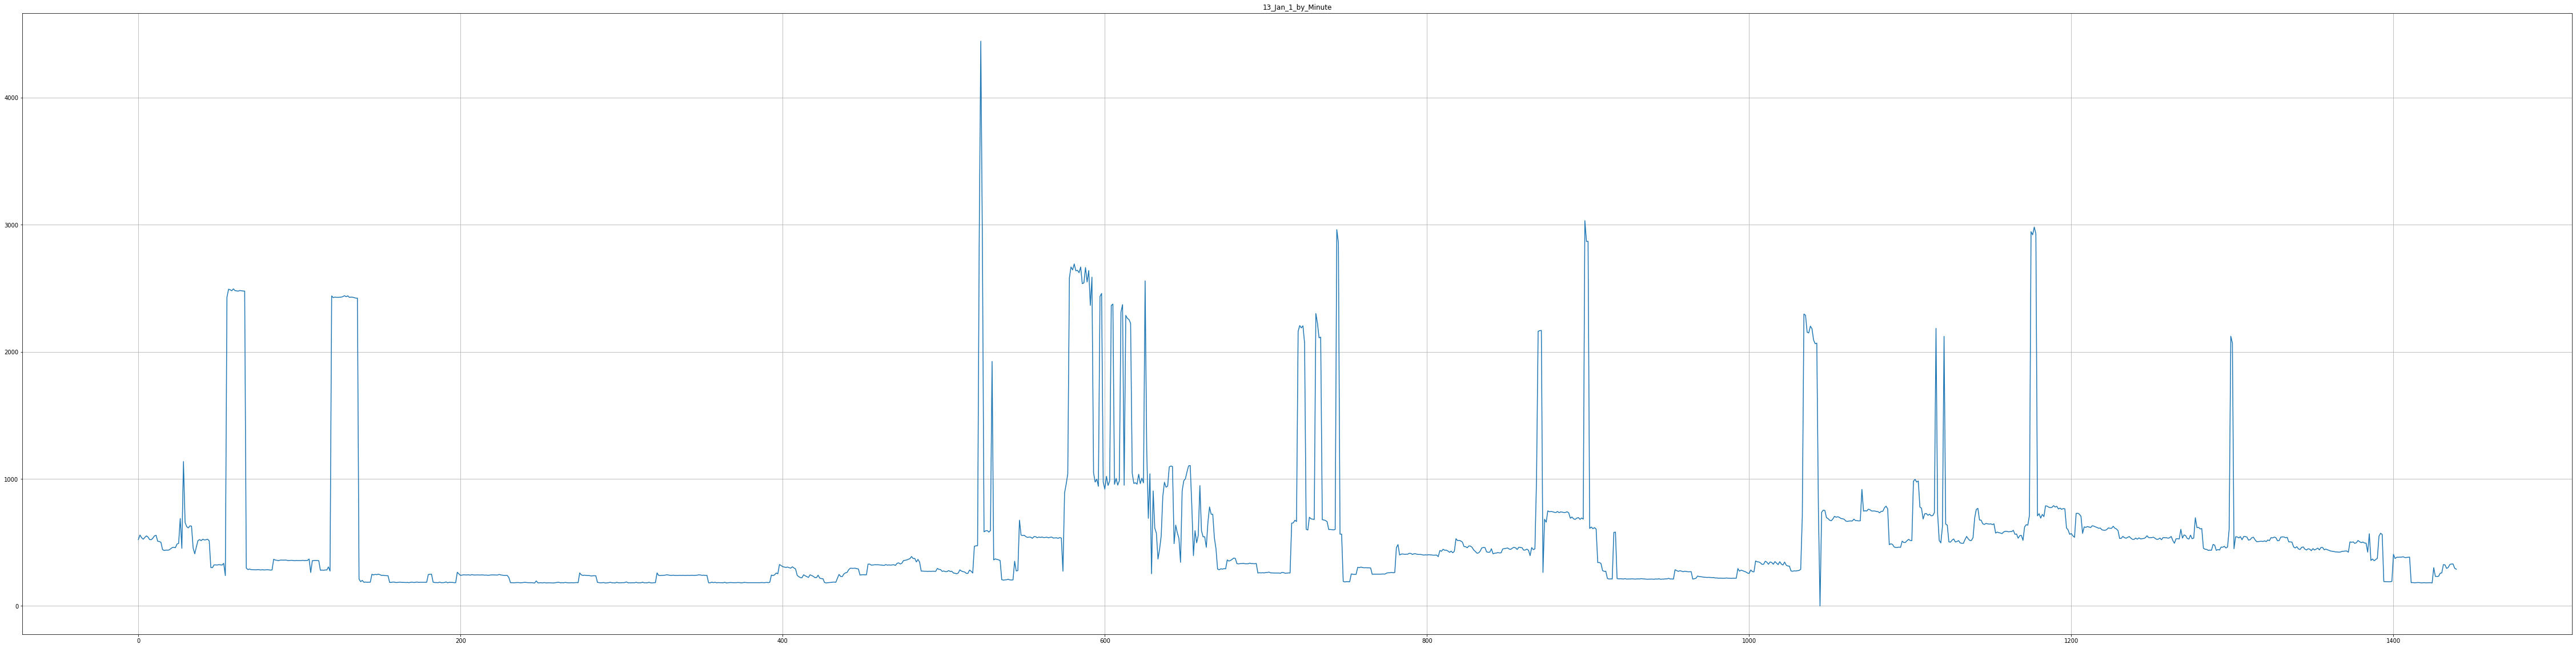

In [136]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_Minute")
plt.plot(range(24*60), total_watt_list)
plt.savefig('./13_Jan_1_by_Minute.png')
plt.show()

In [142]:
electric_Jan = pd.read_csv("./Electirc_Data_CSV_FInal/2013/2013_1_House1_Ch1_Electric_Data_Final.csv", encoding='cp949')
Jan_data=electric_Jan[:24]["Watt"]

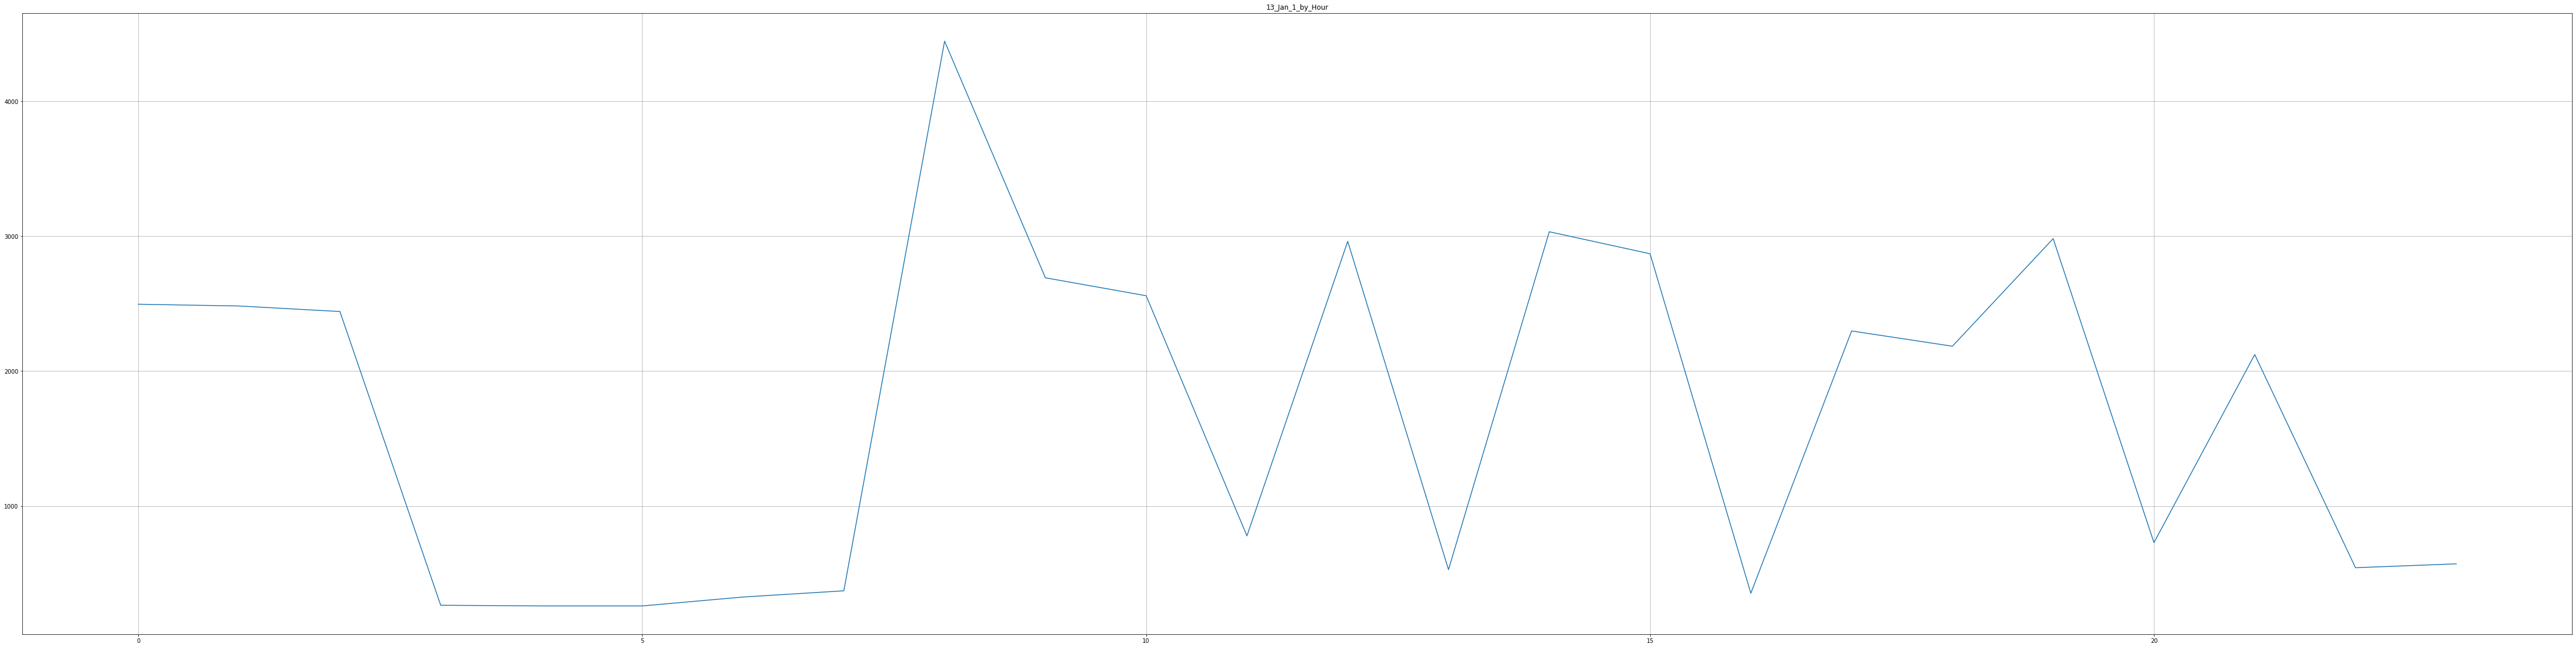

In [143]:
plt.figure(figsize=(80,20))
plt.grid()
plt.title("13_Jan_1_by_Hour")
plt.plot(range(24), Jan_data)
plt.savefig('./13_Jan_1_by_Hour.png')
plt.show()